# Expanding ice Ih and calculating the radial distribution

In [1]:
import numpy as np
from prody import *
from matplotlib import pyplot as plt
import sys
import time

sys.path.insert(0, '../src/')
from parameters import *

import radial_distribution
reload(radial_distribution)
from radial_distribution import *

import pdb_handling
reload(pdb_handling)
from pdb_handling import *

### Parameters

In [2]:
# g(r) parameters
max_r = 26 #Angst
bin_width = .1 
nbins = int(max_r/bin_width) 

# random displacement parameters
n_random = 1
dr = 0.2

# ice parameters
file_name, density, dx, dy, dz = iceIh_parameters()
n_expand=5

In [3]:
save_path = '../analysis/'
data_path = '../data/'
data_file = '%s%s.pdb'%(data_path,file_name)

### Load data

In [5]:
wtr1 = parsePDB(data_file)

@> WARNING failed to parse occupancy at line 0
@> WARNING failed to parse beta-factor at line 0
@> WARNING failed to parse occupancy at line 1
@> WARNING failed to parse beta-factor at line 1
@> WARNING failed to parse occupancy at line 2
@> WARNING failed to parse beta-factor at line 2
@> WARNING failed to parse occupancy at line 3
@> WARNING failed to parse beta-factor at line 3
@> WARNING failed to parse occupancy at line 4
@> WARNING failed to parse beta-factor at line 4
@> WARNING failed to parse occupancy at line 5
@> WARNING failed to parse beta-factor at line 5
@> WARNING failed to parse occupancy at line 6
@> WARNING failed to parse beta-factor at line 6
@> WARNING failed to parse occupancy at line 7
@> WARNING failed to parse beta-factor at line 7
@> WARNING failed to parse occupancy at line 8
@> WARNING failed to parse beta-factor at line 8
@> WARNING failed to parse occupancy at line 9
@> WARNING failed to parse beta-factor at line 9
@> WARNING failed to parse occupancy at 

In [6]:
oxgs1 = wtr1.select('name O1')
oxgs2 = wtr1.select('name O2')
oxgs3 = wtr1.select('name O3')
oxgs4 = wtr1.select('name O4')
oxgs5 = wtr1.select('name O5')
oxgs6 = wtr1.select('name O6')
oxgs =  oxgs1.copy()+oxgs2.copy()+oxgs3.copy()+oxgs4.copy()+oxgs5.copy()+oxgs6.copy()
xyz = oxgs.getCoords()

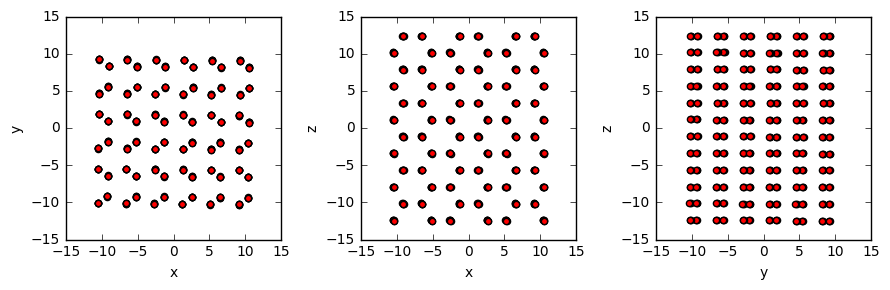

In [48]:
plt.figure(figsize=[9,3])
plt.subplot(1,3,1)
plt.scatter(xyz[:,0],xyz[:,1],c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,3,2)
plt.scatter(xyz[:,0],xyz[:,2],c='r')
plt.xlabel('x')
plt.ylabel('z')
plt.subplot(1,3,3)
plt.scatter(xyz[:,1],xyz[:,2],c='r')
plt.xlabel('y')
plt.ylabel('z')
plt.tight_layout()
plt.show()

### Expand ice

In [49]:
oxgs_expanded = expand_ice(oxgs,n=n_expand,dx=dx,dy=dy,dz=dz)
xyz_expanded  = oxgs_expanded.getCoords()

Crystal expanded: 117A x 110A x 135A 


Remove doubles

In [50]:
xyz_unique = np.unique(xyz_expanded,axis=0)

Save expanded

In [51]:
#outfile = '%s%s_exp.pdb'%(data_path,file_name)
#writePDB(outfile,oxgs_expanded)

### Calculate g(r)

Radial distribution of the expanded crystal

In [52]:
t0 = time.time()
gr0 = calculate_gr(xyz_unique,nbins=nbins,bin_width=bin_width,density=density,radius = max_r)
r = np.arange(0,nbins*bin_width,bin_width)
print time.time()-t0

353.083089828


Introduce disorder 

In [53]:
gr = np.zeros(nbins)
n_oxygens = xyz_unique.shape[0]

rnd = np.random.random_sample((n_oxygens,3))
t0 = time.time()
for i in range(n_random):
    rnd = np.random.random_sample((n_oxygens,3))
    dxyz = (rnd*2-1)*dr
    gr += calculate_gr(xyz_unique+dxyz,nbins=nbins,bin_width=bin_width,density=density,radius = max_r)
gr/=float(n_random)
print time.time()-t0

353.30880785


### plot results

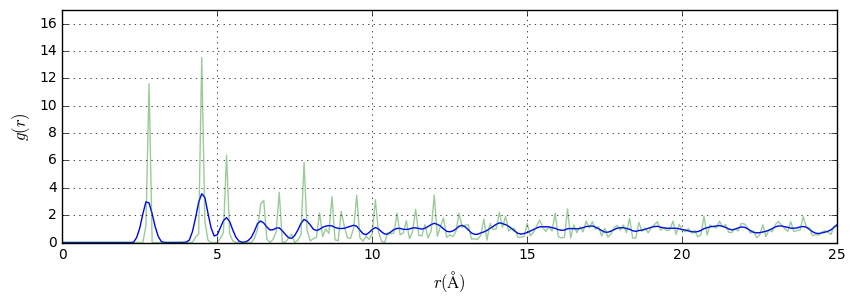

In [66]:
plt.figure(figsize=[10,3])
plt.plot(r,gr)
plt.plot(r,gr0,alpha=0.4)
plt.xlim(0,25)
plt.ylim(0,17)
plt.grid()
plt.ylabel(r'$g(r)$',size=12)
plt.xlabel(r'$r (\rm \AA)$',size=12)
plt.show()

In [55]:
save_file = '%sgr_%s_d=%d_dr=%.1f'%(save_path,file_name,n_expand*min([dx,dy,dz]),dr)
np.save(save_file,np.array([r,gr]))

#np.save('%sgr_expanded_disorder'%save_path,np.array([r,gr]))